# Technical Report Example Title

## Methods
* Goal is to quantify the linearity of the relationship between voltage applied to the ADC and the resulting LED blinking frequency.
* I set the input voltage to 5 known values and collected data points over the 5 seconds of blinking. 
* I ran statistics to compare the values that I collected. 
This doesn't need to be overly verbose; just enough detail so someone could replicate what you did.

## Results

The pseudo-code below is just an example of some steps to do things. Do not feel obligated to get this exact syntax / approach to work.

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
# timing_data = pd.read_csv('data.csv')
data_0V = pd.read_csv('0V.csv')
data_1V = pd.read_csv('1V.csv')
data_1_5V = pd.read_csv('1.5V.csv')
data_2V = pd.read_csv('2V.csv')
data_2_5V = pd.read_csv('2.5V.csv')
data_3V = pd.read_csv('3V.csv')

# Print the first few rows of the data
data_0V.head(20)

,Timestamp(ms),D0,D1,D2,D3,D4,D5,D6,D7
0,0.00,1,0,0,0,0,0,0,0
1,0.01,1,0,0,0,0,0,0,0
2,0.02,1,0,0,0,0,0,0,0
3,0.03,1,0,0,0,0,0,0,0
4,0.04,1,0,0,0,0,0,0,0
5,0.05,1,0,0,0,0,0,0,0
6,0.06,1,0,0,0,0,0,0,0
7,0.07,1,0,0,0,0,0,0,0
8,0.08,1,0,0,0,0,0,0,0
9,0.09,1,0,0,0,0,0,0,0


In [4]:
def calculate_on_off_periods(df, column_name='D0'):
    on_periods = []
    off_periods = []
    current_state = df[column_name].iloc[0]
    start_time = df['Timestamp(ms)'].iloc[0]

    for i in range(1, len(df)):
        if df[column_name].iloc[i] != current_state:
            end_time = df['Timestamp(ms)'].iloc[i]
            duration = end_time - start_time
            if current_state == 1:
                on_periods.append(duration)
            else:
                off_periods.append(duration)
            current_state = df[column_name].iloc[i]
            start_time = end_time

    return on_periods, off_periods

In [5]:
on_periods_0V, off_periods_0V = calculate_on_off_periods(data_0V)
on_periods_1V, off_periods_1V = calculate_on_off_periods(data_1V)
on_periods_1_5V, off_periods_1_5V = calculate_on_off_periods(data_1_5V)
on_periods_2V, off_periods_2V = calculate_on_off_periods(data_2V)
on_periods_2_5V, off_periods_2_5V = calculate_on_off_periods(data_2_5V)
on_periods_3V, off_periods_3V = calculate_on_off_periods(data_3V)

In [6]:
def save_on_periods_to_csv(on_periods, filename, ideal_period):
    on_periods_trimmed = on_periods[1:-1]
    df = pd.DataFrame({
        'Ideal Period (ms)': ideal_period,
        'Measurement Period (ms)': on_periods_trimmed
    })
    df.to_csv(filename, index=False)

In [7]:
save_on_periods_to_csv(on_periods_0V, 'on_periods_0V.csv', 1000)
save_on_periods_to_csv(on_periods_1V, 'on_periods_1V.csv', 733)
save_on_periods_to_csv(on_periods_1_5V, 'on_periods_1_5V.csv', 600)
save_on_periods_to_csv(on_periods_2V, 'on_periods_2V.csv', 467)
save_on_periods_to_csv(on_periods_2_5V, 'on_periods_2_5V.csv', 333)
save_on_periods_to_csv(on_periods_3V, 'on_periods_3V.csv', 200)

In [8]:
on_data_0V = pd.read_csv('on_periods_0V.csv')
on_data_1V = pd.read_csv('on_periods_1V.csv')
on_data_1_5V = pd.read_csv('on_periods_1_5V.csv')
on_data_2V = pd.read_csv('on_periods_2V.csv')
on_data_2_5V = pd.read_csv('on_periods_2_5V.csv')
on_data_3V = pd.read_csv('on_periods_3V.csv')

on_data_0V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
Ideal Period (ms),,,,,,,,
1000,3.0,900.01,2.666193e-13,900.01,900.01,900.01,900.01,900.01


### How to Calculate 95% Confidence Interval for a Mean

In [9]:
# calculate the 95% confidence intervals
confidence_interval = on_data_0V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

confidence_interval = on_data_1V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

confidence_interval = on_data_1_5V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

confidence_interval = on_data_2V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

confidence_interval = on_data_2_5V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

confidence_interval = on_data_3V.groupby('Ideal Period (ms)')['Measurement Period (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

Ideal Period (ms)
1000    (900.0099999999992, 900.0100000000006)
Name: Measurement Period (ms), dtype: object
Ideal Period (ms)
733    (449.98862997513453, 449.99637002486537)
Name: Measurement Period (ms), dtype: object
Ideal Period (ms)
600    (299.9850705546863, 299.9935008738848)
Name: Measurement Period (ms), dtype: object
Ideal Period (ms)
467    (299.98358031318594, 299.99356254395695)
Name: Measurement Period (ms), dtype: object
Ideal Period (ms)
333    (224.97704566726526, 224.98295433273455)
Name: Measurement Period (ms), dtype: object
Ideal Period (ms)
200    (224.9782120044187, 224.98401021780347)
Name: Measurement Period (ms), dtype: object


### How to Plot Hex Data

In [4]:
# `hexdump.txt`` was copied from `LOG_HEXDUMP` terminal output
# we know this is a hexdump of int16 values storing 12-bit data
with open('hexdump.txt', 'r') as f:
    rawdata = f.read()
    
print(rawdata)

                               99 01 47 01 f4 00 a9 00  72 00 3c 00 19 00 ff ff |..G..... r.<.....
                               fc ff 04 00 1c 00 3f 00  72 00 af 00 f4 00 46 01 |......?. r.....F.
                               9c 01 f4 01 50 02 ad 02  03 03 4e 03 98 03 d7 03 |....P... ..N.....
                               06 04 29 04 3e 04 44 04  3d 04 1f 04 00 04 c7 03 |..).>.D. =.......
                               8a 03 40 03 ed 02 92 02  3b 02 e3 01 88 01 2c 01 |..@..... ;.....,.
                               e3 00 a2 00 67 00 37 00  14 00 fd ff f8 ff 07 00 |....g.7. ........
                               22 00 49 00 91 00 bb 00  07 01 55 01 ae 01 08 02 |".I..... ..U.....
                               64 02 bd 02 12 03 5e 03  a4 03 df 03 0f 04 2f 04 |d.....^. ....../.
                               3f 04 45 04 39 04 1c 04  f6 03 c0 03 7c 03 30 03 |?.E.9... ....|.0.
                               e1 02 86 02 2b 02 d1 01  61 01 28 01 d6 00 94 00 |....+... a.(.....
          

In [5]:
# clean up the data

data_lines = rawdata.strip().splitlines()  # get rid of leading/trailing whitespace and split into lines

hex_data = []
for line in data_lines:
    hex_data_line = line.split('|')[0].split()  # split on |, toss the ASCII columns, then split on whitespace
    hex_data.extend(hex_data_line[0:]) # append to the hex data list

print(f'Raw Bytes of Data: {hex_data}')

Raw Bytes of Data: ['99', '01', '47', '01', 'f4', '00', 'a9', '00', '72', '00', '3c', '00', '19', '00', 'ff', 'ff', 'fc', 'ff', '04', '00', '1c', '00', '3f', '00', '72', '00', 'af', '00', 'f4', '00', '46', '01', '9c', '01', 'f4', '01', '50', '02', 'ad', '02', '03', '03', '4e', '03', '98', '03', 'd7', '03', '06', '04', '29', '04', '3e', '04', '44', '04', '3d', '04', '1f', '04', '00', '04', 'c7', '03', '8a', '03', '40', '03', 'ed', '02', '92', '02', '3b', '02', 'e3', '01', '88', '01', '2c', '01', 'e3', '00', 'a2', '00', '67', '00', '37', '00', '14', '00', 'fd', 'ff', 'f8', 'ff', '07', '00', '22', '00', '49', '00', '91', '00', 'bb', '00', '07', '01', '55', '01', 'ae', '01', '08', '02', '64', '02', 'bd', '02', '12', '03', '5e', '03', 'a4', '03', 'df', '03', '0f', '04', '2f', '04', '3f', '04', '45', '04', '39', '04', '1c', '04', 'f6', '03', 'c0', '03', '7c', '03', '30', '03', 'e1', '02', '86', '02', '2b', '02', 'd1', '01', '61', '01', '28', '01', 'd6', '00', '94', '00', '57', '00', '30', '0

Text(0.5, 1.0, 'Extracted Raw Voltage Data from Hexdata Dump')

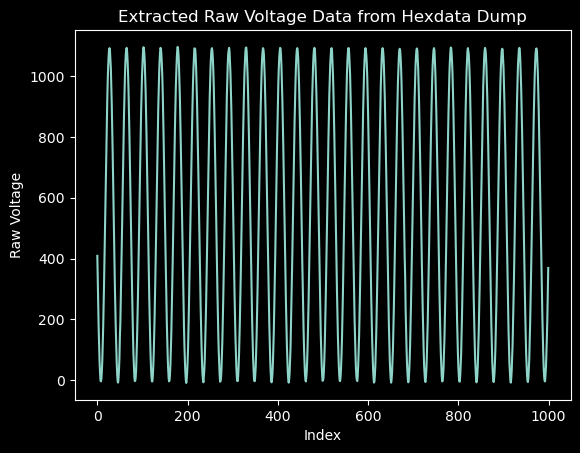

In [6]:
raw_voltage = []
for i in range(0, len(hex_data) - 1, 2): # step by 2 to get every 2 bytes (16 bits) 

    # intepret every two bytes as a 16-bit integer
    raw_value = int(hex_data[i+1] + hex_data[i], 16)
    # mask to get the lower 12 bits (resolution of the ADC specified in the devicetree)
    raw_value &= 0x0FFF
    # interpret signed 12-bit integer (2s complement)
    if raw_value >= 0x800:  # 2048 is 1/2 of 4096 (12-bit int range)
        raw_value -= 0x1000 # subtract 4096
    raw_voltage.append(raw_value)

plt.plot(raw_voltage)
plt.xlabel('Index')
plt.ylabel('Raw Voltage')
plt.title('Extracted Raw Voltage Data from Hexdata Dump')

## How to Perform a Linear Regression

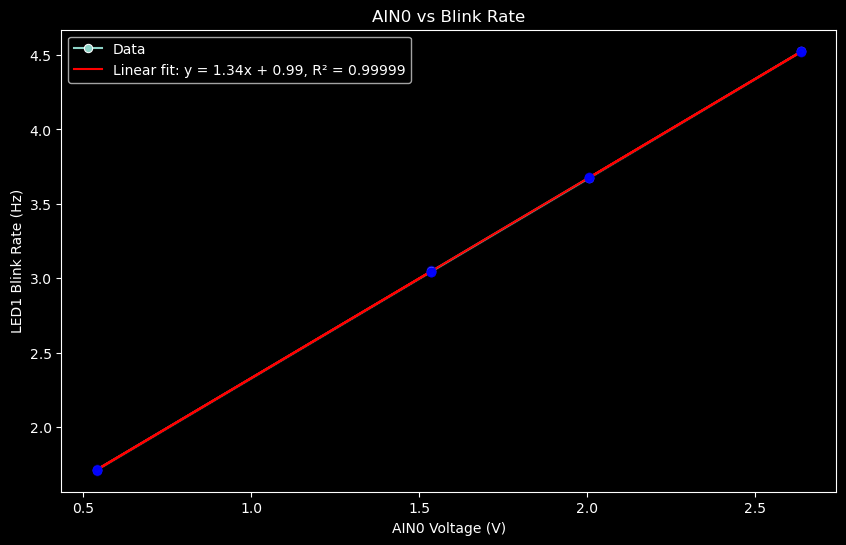

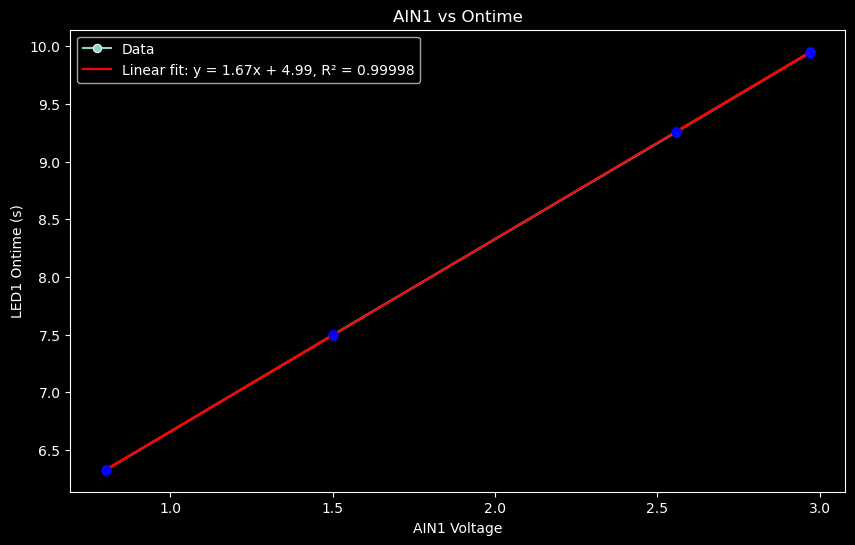

In [ ]:
file_path = 'linear_regression_data.csv'
data = pd.read_csv(file_path)

def plot_with_fit(x, y, x_label, y_label, title):
    # Linear regression
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)
    line = slope * np.array(x) + intercept

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(x=x, y=y, marker='o', label='Data')
    plt.plot(x, line, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}, R² = {r_value**2:.5f}')
    # Adding error bars
    y_err = std_err * np.ones_like(y)
    ax.errorbar(x, y, yerr=y_err, fmt='o', color='blue', alpha=0.5)

    # Labeling the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting for AIN0 vs Blink Rate
plot_with_fit(data['AIN0 Voltage (V)'], data['Blink Rate (Hz)'], 'AIN0 Voltage (V)', 'LED1 Blink Rate (Hz)', 'AIN0 vs Blink Rate')

# Plotting for AIN1 vs Ontime
kjjplot_with_fit(data['AIN1 Voltage'], data['Ontime (s)'], 'AIN1 Voltage', 'LED1 Ontime (s)', 'AIN1 vs Ontime')

In [ ]:
# Calculate 95% confidence intervals for the linear regression data
def calculate_confidence_intervals(x, y):
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)
    n = len(x)
    t_value = sp.stats.t.ppf(0.975, df=n-2)
    slope_confidence_interval = (slope - t_value * std_err, slope + t_value * std_err)
    intercept_confidence_interval = (intercept - t_value * std_err * np.sqrt(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2)),
                                     intercept + t_value * std_err * np.sqrt(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
    return slope_confidence_interval, intercept_confidence_interval

# Calculate and print confidence intervals for AIN0 vs Blink Rate
slope_ci, intercept_ci = calculate_confidence_intervals(data['AIN0 Voltage (V)'], data['Blink Rate (Hz)'])
print(f'AIN0 vs Blink Rate - Slope CI: {slope_ci}, Intercept CI: {intercept_ci}')

# Calculate and print confidence intervals for AIN1 vs Ontime
slope_ci, intercept_ci = calculate_confidence_intervals(data['AIN1 Voltage'], data['Ontime (s)'])
print(f'AIN1 vs Ontime - Slope CI: {slope_ci}, Intercept CI: {intercept_ci}')

AIN0 vs Blink Rate - Slope CI: (np.float64(1.338545075616044), np.float64(1.3435512741550437)), Intercept CI: (np.float64(0.9864800062521749), np.float64(0.9891802224821699))
AIN1 vs Ontime - Slope CI: (np.float64(1.665312415661332), np.float64(1.6729750022943717)), Intercept CI: (np.float64(4.988566333812498), np.float64(4.992839761102681))


## Discussion

How well did things agree with your nominal values?

If things didn't agree, why not?